In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# === FEATURE COLUMNS ===
numeric_features = [
    'hour_of_day', 'day_of_week', 'month', 'is_weekend',
    'departures', 'arrivals', 'capacity',
    'prev_available', 'prev_departures', 'prev_arrivals'
]
categorical_features = ['station_id']
target = 'available_bikes'

In [ ]:
df_lag_full = pd.read_csv("full_df_lag.csv")
train_full, test_full = train_test_split(df_lag_full, test_size=0.2, random_state=42)

(train_full).to_csv("full_df_lag_train.csv")
(test_full).to_csv("full_df_lag_validation.csv")

In [ ]:
train_full.shape, test_full.shape, df_lag_full.shape, train_full.shape[0] + test_full.shape[0]

((6138770, 18), (1534693, 18), (7673463, 18), 7673463)

In [ ]:
predictions = np.load("/home/rishika/Intro_to_DS/MiniProject/SGD_stable_preds_for_validation.npy")

In [ ]:
y_test=test_full['available_bikes']
X_sample = test_full[numeric_features + categorical_features]
# y_mean = train_full[target].mean()
# predictions += y_mean - predictions.mean() #to unshift everything

In [ ]:
# predictions = np.clip(predictions, 0, X_sample['capacity'].to_numpy())


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("=== Linear Regression with Lag Features ===")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

=== Linear Regression with Lag Features ===
RMSE: 0.29
R²: 0.999


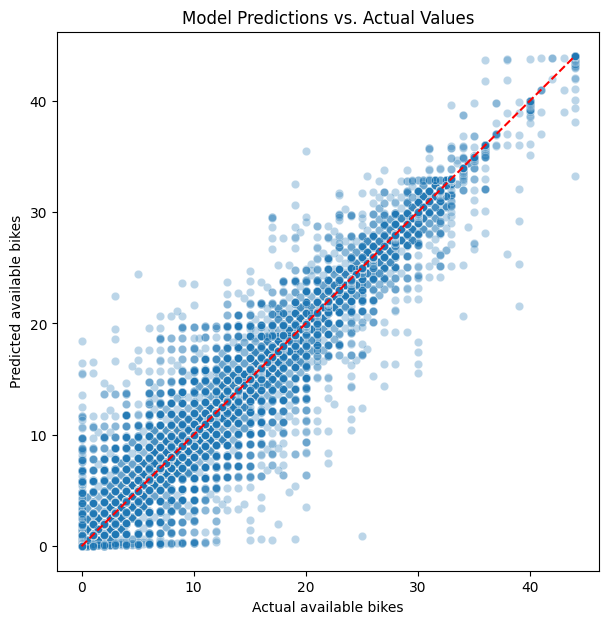

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual available bikes")
plt.ylabel("Predicted available bikes")
plt.title("Model Predictions vs. Actual Values")
plt.show()

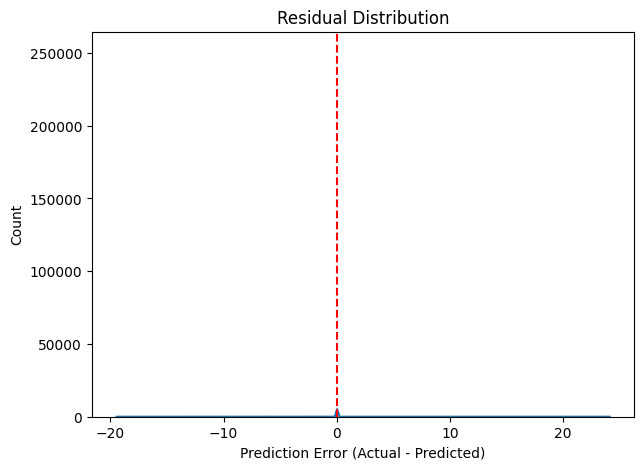

In [ ]:

residuals = y_test - predictions

plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='r', linestyle='--')
plt.title("Residual Distribution")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.show()

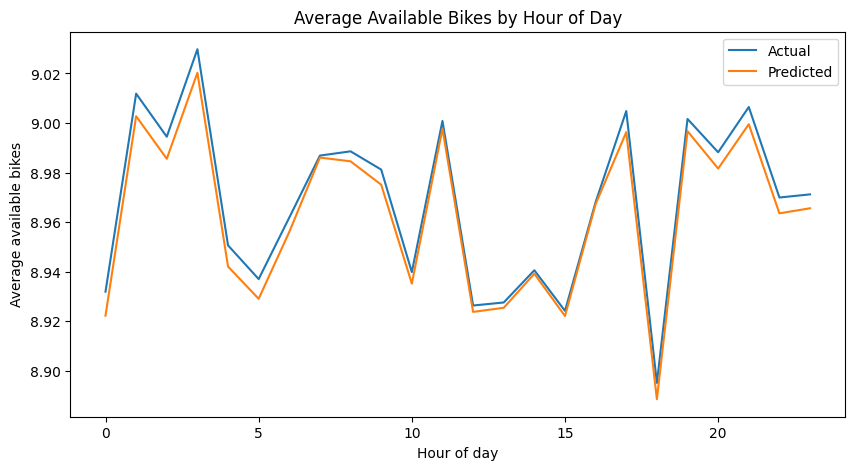

In [ ]:
# Add predictions back to test set
X_test_copy = X_sample.copy()
X_test_copy['y_true'] = y_test
X_test_copy['y_pred'] = predictions

# Plot average availability by hour
hourly_avg = X_test_copy.groupby('hour_of_day')[['y_true', 'y_pred']].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_avg, x='hour_of_day', y='y_true', label='Actual')
sns.lineplot(data=hourly_avg, x='hour_of_day', y='y_pred', label='Predicted')
plt.title("Average Available Bikes by Hour of Day")
plt.ylabel("Average available bikes")
plt.xlabel("Hour of day")
plt.legend()
plt.show()

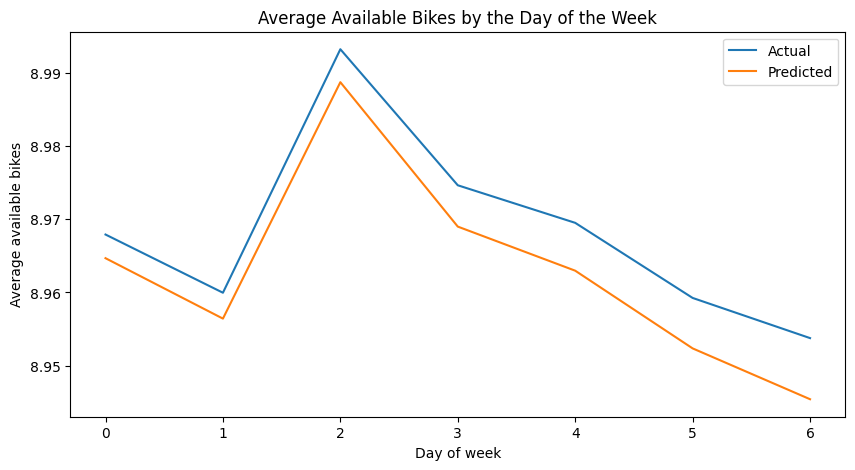

In [ ]:
X_test_copy = X_sample.copy()
X_test_copy['y_true'] = y_test
X_test_copy['y_pred'] = predictions

# Plot average availability by hour
daily_avg = X_test_copy.groupby('day_of_week')[['y_true', 'y_pred']].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=daily_avg, x='day_of_week', y='y_true', label='Actual')
sns.lineplot(data=daily_avg, x='day_of_week', y='y_pred', label='Predicted')
plt.title("Average Available Bikes by the Day of the Week")
plt.ylabel("Average available bikes")
plt.xlabel("Day of week")
plt.legend()
plt.show()

In [ ]:
df_lag_full = pd.read_csv("full_df_lag.csv")
train_full, test_full = train_test_split(df_lag_full, test_size=0.2, random_state=42)

(train_full).to_csv("full_df_lag_train.csv")
(test_full).to_csv("full_df_lag_validation.csv")

In [ ]:
df_lag_full = pd.read_csv("full_df_lag.csv")
train_full, test_full = train_test_split(df_lag_full, test_size=0.2, random_state=42)

(train_full).to_csv("full_df_lag_train.csv")
(test_full).to_csv("full_df_lag_validation.csv")

In [ ]:
train_full.shape, test_full.shape, df_lag_full.shape, train_full.shape[0] + test_full.shape[0]

((6138770, 18), (1534693, 18), (7673463, 18), 7673463)

In [ ]:
predictions = np.load("/home/rishika/Intro_to_DS/MiniProject/SGD_stable_preds_for_validation.npy")

In [ ]:
y_test=test_full['available_bikes']
X_sample = test_full[numeric_features + categorical_features]
y_mean = train_full[target].mean()
predictions += y_mean - predictions.mean() #to unshift everything

In [ ]:
predictions = np.clip(predictions, 0, X_sample['capacity'].to_numpy())


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("=== Linear Regression with Lag Features ===")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

=== Linear Regression with Lag Features ===
RMSE: 0.29
R²: 0.999


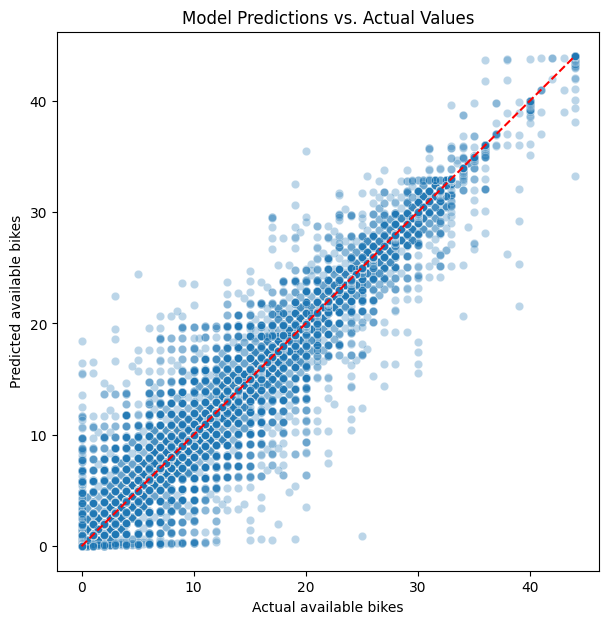

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual available bikes")
plt.ylabel("Predicted available bikes")
plt.title("Model Predictions vs. Actual Values")
plt.show()

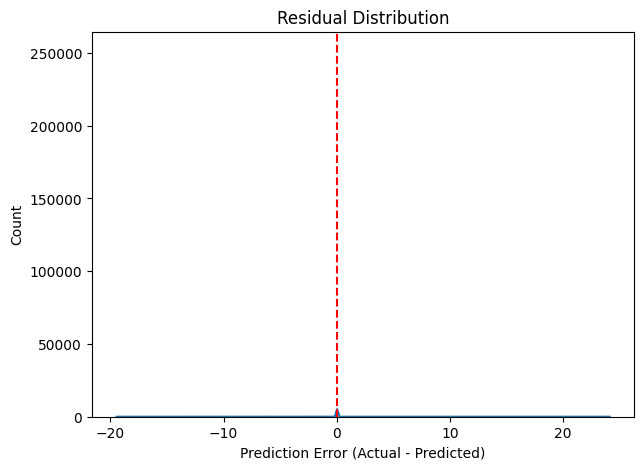

In [ ]:

residuals = y_test - predictions

plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='r', linestyle='--')
plt.title("Residual Distribution")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.show()

In [ ]:
residuals.max(), residuals.min()

(np.float64(24.12131732016832), np.float64(-19.460785495126693))

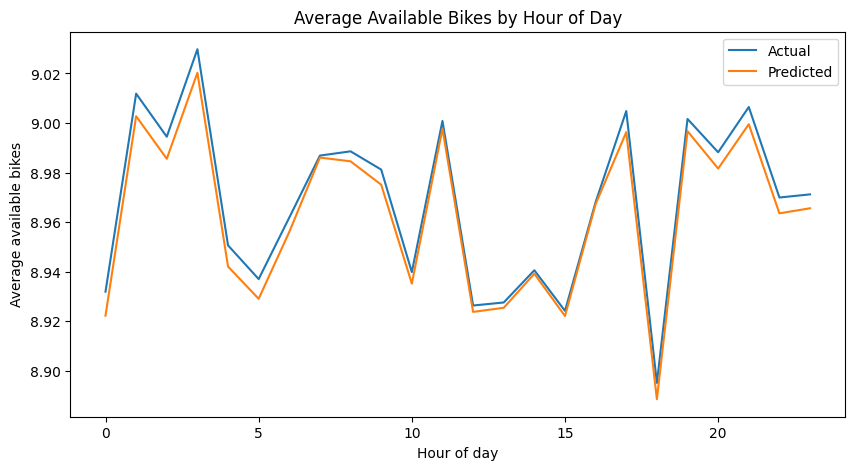

In [ ]:
# Add predictions back to test set
X_test_copy = X_sample.copy()
X_test_copy['y_true'] = y_test
X_test_copy['y_pred'] = predictions

# Plot average availability by hour
hourly_avg = X_test_copy.groupby('hour_of_day')[['y_true', 'y_pred']].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_avg, x='hour_of_day', y='y_true', label='Actual')
sns.lineplot(data=hourly_avg, x='hour_of_day', y='y_pred', label='Predicted')
plt.title("Average Available Bikes by Hour of Day")
plt.ylabel("Average available bikes")
plt.xlabel("Hour of day")
plt.legend()
plt.show()

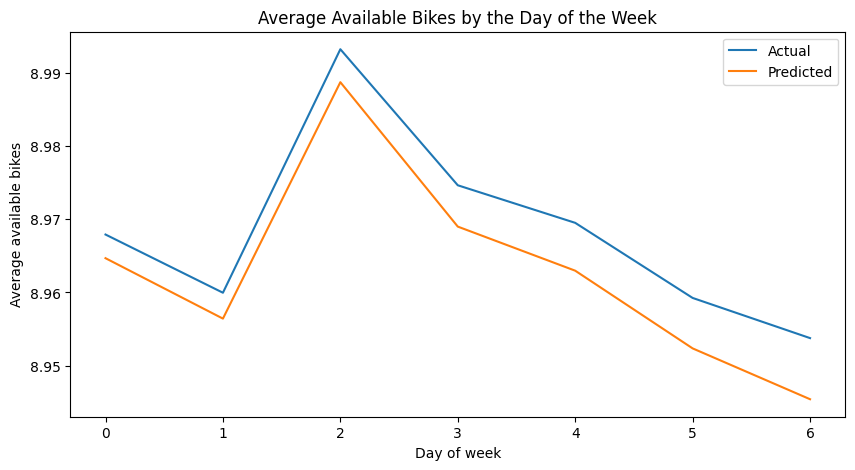

In [ ]:
X_test_copy = X_sample.copy()
X_test_copy['y_true'] = y_test
X_test_copy['y_pred'] = predictions

# Plot average availability by hour
daily_avg = X_test_copy.groupby('day_of_week')[['y_true', 'y_pred']].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=daily_avg, x='day_of_week', y='y_true', label='Actual')
sns.lineplot(data=daily_avg, x='day_of_week', y='y_pred', label='Predicted')
plt.title("Average Available Bikes by the Day of the Week")
plt.ylabel("Average available bikes")
plt.xlabel("Day of week")
plt.legend()
plt.show()

In [ ]:
train_full.shape, test_full.shape, df_lag_full.shape, train_full.shape[0] + test_full.shape[0]

((6138770, 18), (1534693, 18), (7673463, 18), 7673463)

In [ ]:
predictions = np.load("/home/rishika/Intro_to_DS/MiniProject/SGD_stable_preds_for_validation.npy")

In [ ]:
y_test=test_full['available_bikes']
X_sample = test_full[numeric_features + categorical_features]
y_mean = train_full[target].mean()
predictions += y_mean - predictions.mean() #to unshift everything

In [ ]:
predictions = np.clip(predictions, 0, X_sample['capacity'].to_numpy())


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("=== Linear Regression with Lag Features ===")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

=== Linear Regression with Lag Features ===
RMSE: 0.29
R²: 0.999


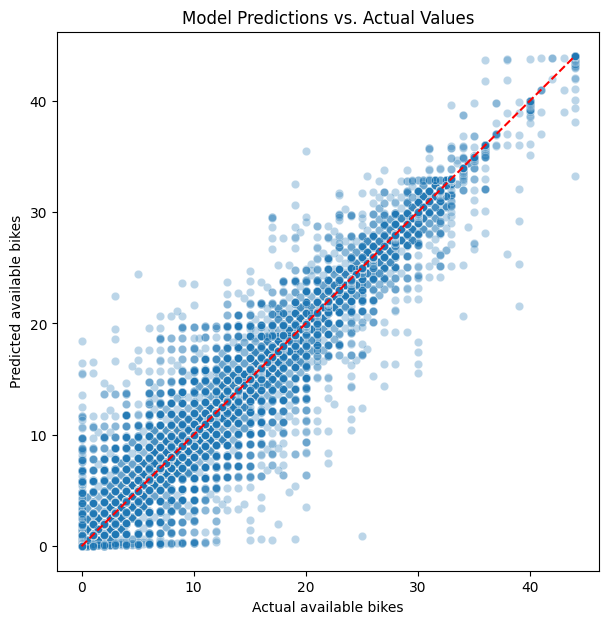

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual available bikes")
plt.ylabel("Predicted available bikes")
plt.title("Model Predictions vs. Actual Values")
plt.show()

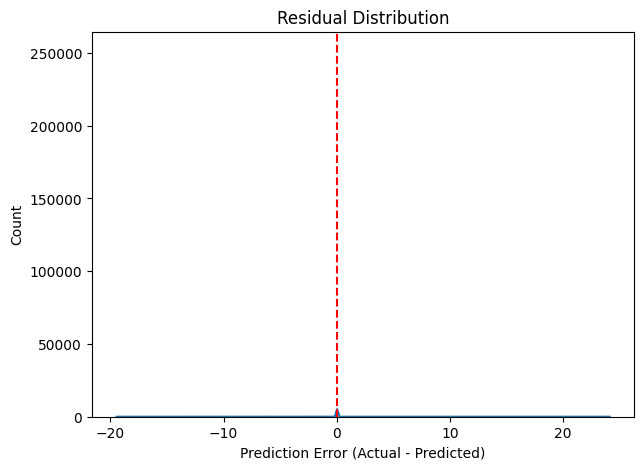

In [ ]:

residuals = y_test - predictions

plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='r', linestyle='--')
plt.title("Residual Distribution")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.show()

In [ ]:
residuals.max(), residuals.min()

(np.float64(24.12131732016832), np.float64(-19.460785495126693))

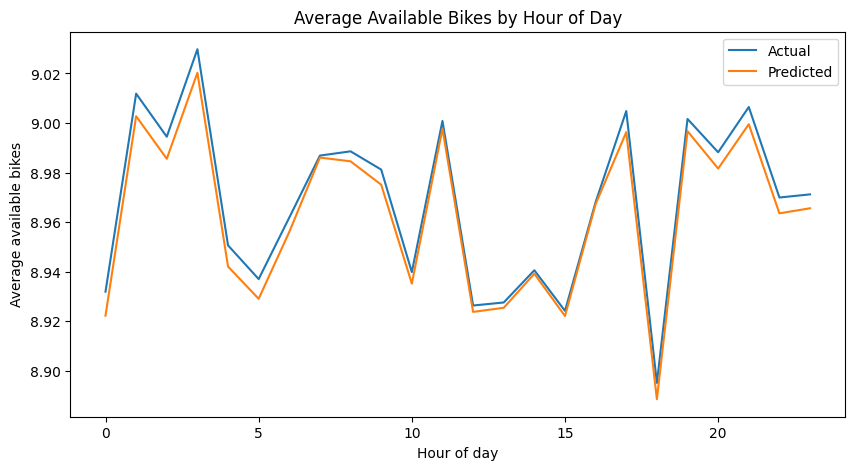

In [ ]:
# Add predictions back to test set
X_test_copy = X_sample.copy()
X_test_copy['y_true'] = y_test
X_test_copy['y_pred'] = predictions

# Plot average availability by hour
hourly_avg = X_test_copy.groupby('hour_of_day')[['y_true', 'y_pred']].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_avg, x='hour_of_day', y='y_true', label='Actual')
sns.lineplot(data=hourly_avg, x='hour_of_day', y='y_pred', label='Predicted')
plt.title("Average Available Bikes by Hour of Day")
plt.ylabel("Average available bikes")
plt.xlabel("Hour of day")
plt.legend()
plt.show()

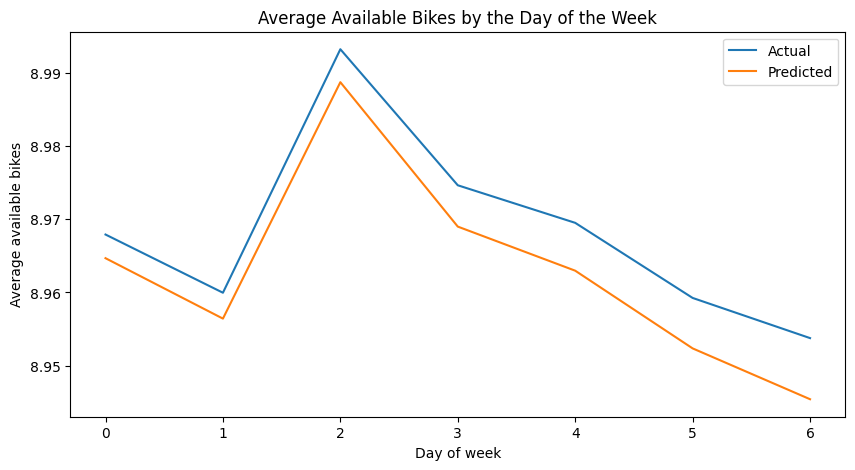

In [ ]:
X_test_copy = X_sample.copy()
X_test_copy['y_true'] = y_test
X_test_copy['y_pred'] = predictions

# Plot average availability by hour
daily_avg = X_test_copy.groupby('day_of_week')[['y_true', 'y_pred']].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=daily_avg, x='day_of_week', y='y_true', label='Actual')
sns.lineplot(data=daily_avg, x='day_of_week', y='y_pred', label='Predicted')
plt.title("Average Available Bikes by the Day of the Week")
plt.ylabel("Average available bikes")
plt.xlabel("Day of week")
plt.legend()
plt.show()